In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display
import warnings
import json

In [2]:
# Settings
sns.set_style("whitegrid")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
warnings.filterwarnings("ignore")

# 🔍 Data Observation

In [17]:
# Load Data
comp_path = '/kaggle/input/MABe-mouse-behavior-detection'
train_df = pd.read_csv(os.path.join(comp_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(comp_path, 'test.csv'))
ss_df = pd.read_csv(os.path.join(comp_path, 'sample_submission.csv'))
df_dict = {
    "Training data": train_df,
    "Testing data": test_df,
    "Sample submission": ss_df,
}

test_tracking_dir = os.path.join(comp_path, 'test_tracking')
train_annotation_dir = os.path.join(comp_path, 'train_annotation')

# Example data to check
train_annotation_example = pd.read_parquet('/kaggle/input/MABe-mouse-behavior-detection/train_annotation/AdaptableSnail/1212811043.parquet')
train_tracking_example = pd.read_parquet(r'/kaggle/input/MABe-mouse-behavior-detection/train_tracking/AdaptableSnail/1212811043.parquet')

In [11]:
display(train_df)

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,UppityFerret,1610683375,C57Bl/6N,black,male,8.0,8 weeks,csds,CD1,white,...,13.0,664,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8785,UppityFerret,1725214092,C57Bl/6N,black,male,27.0,8 weeks,NaN,CD1,white,...,12.8,608,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,intromit"", ""mouse1,mouse2,moun...",DeepLabCut
8786,UppityFerret,1960237444,C57Bl/6N,black,male,14.0,8 weeks,csds,CD1,white,...,12.5,592,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8787,UppityFerret,2045808129,C57Bl/6N,black,male,12.0,8 weeks,csds,CD1,white,...,12.5,624,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut


In [13]:
print(train_df.iloc[0])

lab_id                                                   AdaptableSnail
video_id                                                       44566106
mouse1_strain                                                CD-1 (ICR)
mouse1_color                                                      white
mouse1_sex                                                         male
mouse1_id                                                          10.0
mouse1_age                                                   8-12 weeks
mouse1_condition                                        wireless device
mouse2_strain                                                CD-1 (ICR)
mouse2_color                                                      white
mouse2_sex                                                         male
mouse2_id                                                          24.0
mouse2_age                                                   8-12 weeks
mouse2_condition                                        wireless

In [19]:
train_df["body_parts_tracked"].iloc[0]

'["body_center", "ear_left", "ear_right", "headpiece_bottombackleft", "headpiece_bottombackright", "headpiece_bottomfrontleft", "headpiece_bottomfrontright", "headpiece_topbackleft", "headpiece_topbackright", "headpiece_topfrontleft", "headpiece_topfrontright", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]'

In [20]:
train_df["behaviors_labeled"].iloc[0]

'["mouse1,mouse2,approach", "mouse1,mouse2,attack", "mouse1,mouse2,avoid", "mouse1,mouse2,chase", "mouse1,mouse2,chaseattack", "mouse1,mouse2,submit", "mouse1,mouse3,approach", "mouse1,mouse3,attack", "mouse1,mouse3,avoid", "mouse1,mouse3,chase", "mouse1,mouse3,chaseattack", "mouse1,mouse3,submit", "mouse1,mouse4,approach", "mouse1,mouse4,attack", "mouse1,mouse4,avoid", "mouse1,mouse4,chase", "mouse1,mouse4,chaseattack", "mouse1,mouse4,submit", "mouse1,self,rear", "mouse2,mouse1,approach", "mouse2,mouse1,attack", "mouse2,mouse1,avoid", "mouse2,mouse1,chase", "mouse2,mouse1,chaseattack", "mouse2,mouse1,submit", "mouse2,mouse3,approach", "mouse2,mouse3,attack", "mouse2,mouse3,avoid", "mouse2,mouse3,chase", "mouse2,mouse3,chaseattack", "mouse2,mouse3,submit", "mouse2,mouse4,approach", "mouse2,mouse4,attack", "mouse2,mouse4,avoid", "mouse2,mouse4,chase", "mouse2,mouse4,chaseattack", "mouse2,mouse4,submit", "mouse2,self,rear", "mouse3,mouse1,approach", "mouse3,mouse1,attack", "mouse3,mouse1

In [7]:
train_annotation_example

,agent_id,target_id,action,start_frame,stop_frame
0,1,3,chase,2,54
1,1,3,chase,128,234
2,3,2,avoid,324,342
3,3,1,avoid,324,342
4,1,2,chase,942,1052
...,...,...,...,...,...
365,1,2,chase,86668,86689
366,1,4,avoid,86815,86845
367,1,3,attack,89171,89194
368,4,2,avoid,89272,89299


In [21]:
train_tracking_example

,video_frame,mouse_id,bodypart,x,y
0,0,1,body_center,496.187012,376.475006
1,0,1,ear_left,494.059998,343.924011
2,0,1,ear_right,518.765015,367.362000
3,0,1,lateral_left,474.536987,370.563995
4,0,1,lateral_right,505.825012,394.937012
...,...,...,...,...,...
2677001,89975,4,lateral_right,348.324005,584.469971
2677002,89975,4,nose,420.062988,585.309998
2677003,89975,4,tail_base,323.226013,561.976990
2677004,89975,4,tail_midpoint,287.417999,552.995972


# 📊 Data Exploration

## Number of videos per lab

In [31]:
# Count unique video_ids per lab_id
videos_per_lab = train_df.groupby('lab_id')['video_id'].nunique().sort_values(ascending=False)
videos_per_lab

lab_id
MABe22_keypoints        5320
MABe22_movies           2606
CalMS21_supplemental     297
CalMS21_task1            101
CalMS21_task2             76
SparklingTapir            69
JovialSwallow             52
PleasantMeerkat           36
InvincibleJellyfish       33
TranquilPanther           25
LyricalHare               24
UppityFerret              21
CRIM13                    21
ReflectiveManatee         20
ElegantMink               19
GroovyShrew               17
AdaptableSnail            17
NiftyGoldfinch            11
CautiousGiraffe           10
BoisterousParrot           8
DeliriousFly               6
Name: video_id, dtype: int64

## Count behaviors

In [40]:
lab_action_data = []

for idx, row in train_df.iterrows():
    lab_id = row['lab_id']
    try:
        behaviors_list = json.loads(row['behaviors_labeled'].replace("'", '"'))
        for behavior in behaviors_list:
            action = behavior.split(',')[-1]  # Get the action part
            lab_action_data.append({'lab_id': lab_id, 'action': action})
    except:
        pass

lab_action_df = pd.DataFrame(lab_action_data)

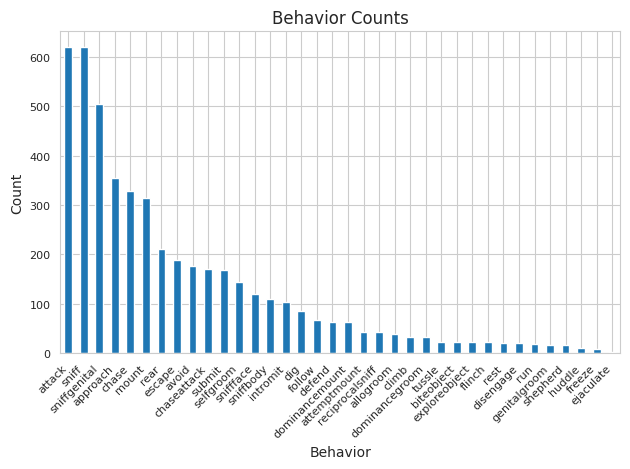

In [64]:
action_counts = lab_action_df['action'].value_counts()

plt.figure()
action_counts.plot(kind='bar', fontsize=8)
plt.xlabel("Behavior")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.title("Behavior Counts")
plt.tight_layout()
plt.show()

## Action Types by Lab ID

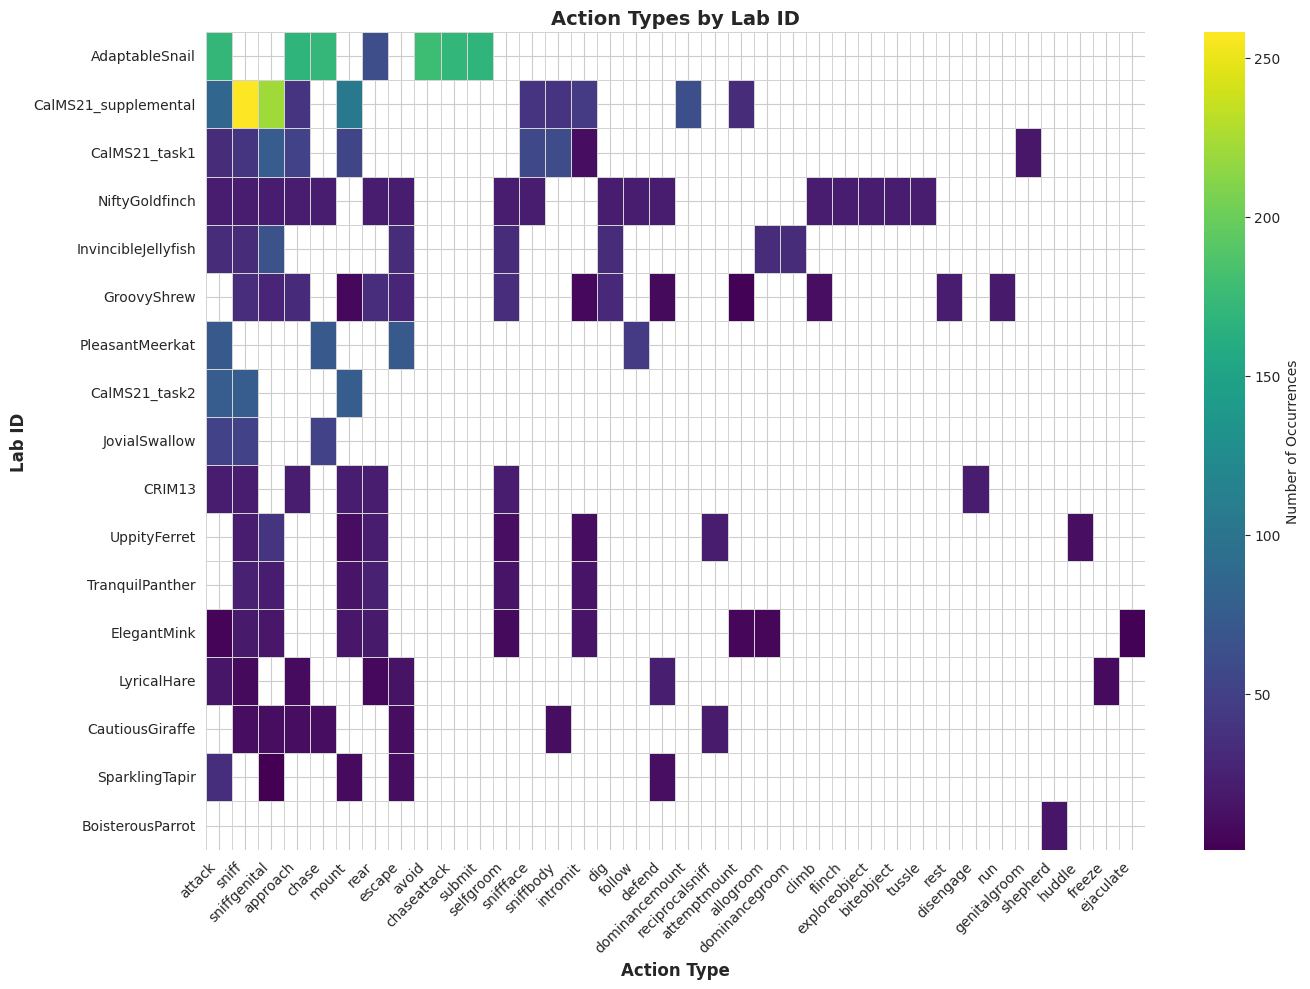

In [34]:
# Create dataframe and count occurrences
action_matrix = lab_action_df.groupby(['lab_id', 'action']).size().unstack(fill_value=0)

# Sort columns by total occurrences (descending)
column_sums = action_matrix.sum(axis=0).sort_values(ascending=False)
action_matrix = action_matrix[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = action_matrix.sum(axis=1).sort_values(ascending=False)
action_matrix = action_matrix.loc[row_sums.index]

# Replace 0 with NaN to make them appear white/empty in the heatmap
action_matrix_masked = action_matrix.replace(0, np.nan)

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(action_matrix_masked, cmap='viridis', annot=False, fmt='g',
            cbar_kws={'label': 'Number of Occurrences'},
            linewidths=0.5, linecolor='lightgray')
plt.xlabel('Action Type', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Action Types by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Body Parts Tracked by Lab ID

Each lab used different technology to track their mice, so the specific body parts tracked may vary.

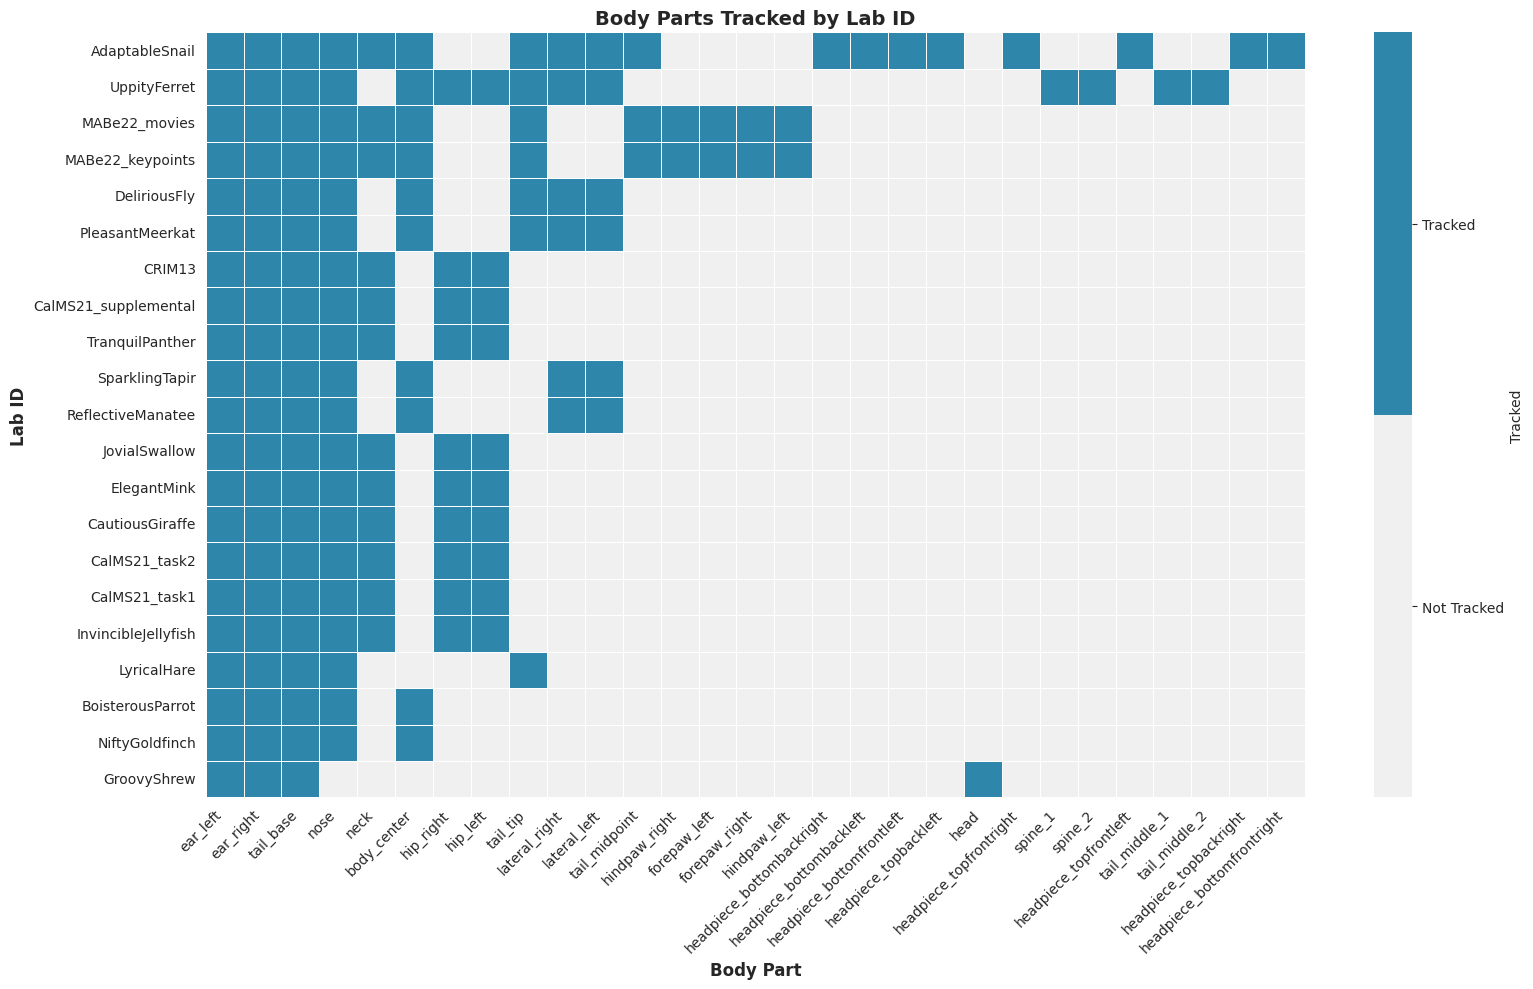

In [67]:
# Build a dataframe with lab_id and body parts
lab_bodypart_data = []

for idx, row in train_df.iterrows():
    lab_id = row['lab_id']
    try:
        body_parts_list = json.loads(row['body_parts_tracked'].replace("'", '"'))
        # Extract each body part
        for body_part in body_parts_list:
            lab_bodypart_data.append({'lab_id': lab_id, 'body_part': body_part})
    except:
        pass

# Create dataframe and get unique combinations (1 if tracked, 0 if not)
lab_bodypart_df = pd.DataFrame(lab_bodypart_data)
bodypart_matrix = lab_bodypart_df.groupby(['lab_id', 'body_part']).size().unstack(fill_value=0)

# Convert to boolean (True if tracked, False if not)
bodypart_matrix_bool = (bodypart_matrix > 0).astype(int)

# Sort columns by total occurrences (descending)
column_sums = bodypart_matrix_bool.sum(axis=0).sort_values(ascending=False)
bodypart_matrix_bool = bodypart_matrix_bool[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = bodypart_matrix_bool.sum(axis=1).sort_values(ascending=False)
bodypart_matrix_bool = bodypart_matrix_bool.loc[row_sums.index]

# Create custom colormap for binary data (white = not tracked, blue = tracked)
from matplotlib.colors import ListedColormap
colors = ['#f0f0f0', '#2E86AB']  # Light gray for 0, Blue for 1
cmap = ListedColormap(colors)

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(bodypart_matrix_bool, cmap=cmap, annot=False, fmt='d',
            cbar_kws={'label': 'Tracked', 'ticks': [0.25, 0.75]},
            linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticklabels(['Not Tracked', 'Tracked'])

plt.xlabel('Body Part', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Body Parts Tracked by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Tracking Method by Lab ID

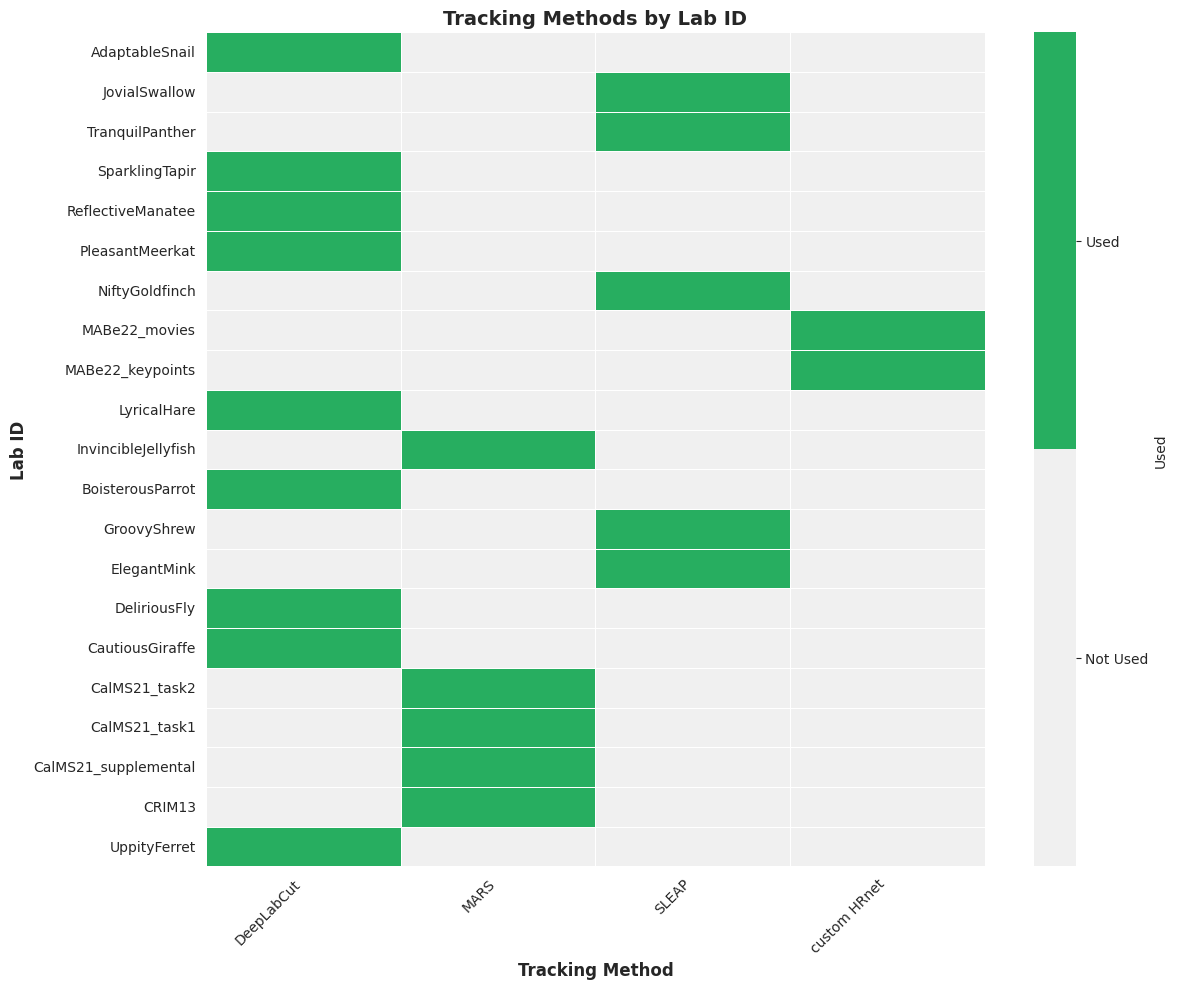

In [68]:
import json

# Get unique tracking methods per lab
tracking_by_lab = train_df.groupby('lab_id')['tracking_method'].apply(lambda x: x.unique().tolist()).to_dict()

# Create a summary dataframe
tracking_summary = train_df.groupby(['lab_id', 'tracking_method']).size().unstack(fill_value=0)

# Convert to boolean (True if used, False if not)
tracking_summary_bool = (tracking_summary > 0).astype(int)

# Sort columns by total occurrences (descending)
column_sums = tracking_summary_bool.sum(axis=0).sort_values(ascending=False)
tracking_summary_bool = tracking_summary_bool[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = tracking_summary_bool.sum(axis=1).sort_values(ascending=False)
tracking_summary_bool = tracking_summary_bool.loc[row_sums.index]

# Create custom colormap for binary data (light gray = not used, green = used)
from matplotlib.colors import ListedColormap
colors = ['#f0f0f0', '#27AE60']  # Light gray for 0, Green for 1
cmap = ListedColormap(colors)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tracking_summary_bool, cmap=cmap, annot=False, fmt='d',
            cbar_kws={'label': 'Used', 'ticks': [0.25, 0.75]},
            linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticklabels(['Not Used', 'Used'])

plt.xlabel('Tracking Method', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Tracking Methods by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()